In [1]:
import pandas as pd
import numpy as np

### Steps for clustering

1. Load Data
2. Understand and Explore Data
3. Data Cleaning
4. Drop Irrelevant Columns
5. Feature Selection and Engineering
6. Encode Categorical Variables
7. Scale/Normalize Numerical Features
8. Choose Clustering Algorithm
9. Determine Optimal Number of Clusters
10. Fit Clustering Model
11. Evaluate Clusters
12. Visualize Clusters
13. Report Insights and Recommendations
14. Save and Deploy Model (Optional)


In [ ]:
### Steps for clustering
steps = [
    "1. Load Data",
    "2. Understand and Explore Data",
    "3. Data Cleaning",
    "4. Drop Irrelevant Columns",
    "5. Feature Selection and Engineering",
    "6. Encode Categorical Variables",
    "7. Scale/Normalize Numerical Features",
    "8. Choose Clustering Algorithm",
    "9. Determine Optimal Number of Clusters",
    "10. Fit Clustering Model",
    "11. Evaluate Clusters",
    "12. Visualize Clusters",
    "13. Report Insights and Recommendations",
    "14. Save and Deploy Model (Optional)",
]

### Step 1 . Load Data


In [ ]:
df = pd.read_csv("shopping_behavior_Zubaira_Maimona.csv")

df.head()
df.columns
# df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Step 2 . EDA ( Exploratory Data Analysis )


In [4]:
# Understanding Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.shape

(3900, 18)

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# Exploring categorical counts

categorical_feature = [
    "Gender",
    "Category",
    "Location",
    "Size",
    "Color",
    "Season",
    "Subscription Status",
    # "Shipping Type",
    "Promo Code Used",
    "Payment Method",
    "Discount Applied",
]

for col in categorical_feature:
    print(f"----{col} out of {df[col].shape[0]}----")
    print(df[col].value_counts())
    print()


numeric_features = [
    # "Age",
    "Purchase Amount (USD)",
    "Review Rating",
    "Previous Purchases",
    "Frequency of Purchases",
    "Review Rating",
]

for col in numeric_features:
    print(f"----{col} out of {df[col].shape[0]}----")
    print(df[col].value_counts())
    print()

----Gender out of 3900----
Gender
Male      2652
Female    1248
Name: count, dtype: int64

----Category out of 3900----
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

----Location out of 3900----
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania

In [8]:
df["Gender"]

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
3895    Female
3896    Female
3897    Female
3898    Female
3899    Female
Name: Gender, Length: 3900, dtype: object

#### Step 2.1 . Visualization


In [9]:
# 1. Histograms for numeric features

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 1. histogram for numerical features

# df[numeric_features].hist(bins=25, figsize=(15, 10), grid=False)
# plt.suptitle("Histogram of Numeric Features")
# plt.show()

In [11]:
# 2. Bar plots for categorical features

# plt.figure(figsize=(20,40))
# for i, col in enumerate(categorical_feature, 1):
#     plt.subplot(6,2,i)
#     sns.countplot(y=col, data=df, order=df[col].value_counts().index)
#     plt.title(f'Bar layout of {col}')
# plt.tight_layout()
# plt.show()

In [12]:
# df[numeric_features].info()
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [13]:
freq_map = {
    "Annually": 12,
    "Every 3 Months": 3,
    "Quarterly": 3,
    "Monthly": 1,
    "Bi-Weekly": 0.5,
    "Fortnightly": 0.5,
    "Weekly": 0.25,
}

df["Frequency of Purchases"] = df["Frequency of Purchases"].map(freq_map)
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
3.00     1147
0.50     1089
12.00     572
1.00      553
0.25      539
Name: count, dtype: int64

In [14]:
# 3. Correlation matrix heatmap for numeric data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = df[numeric_features].corr()
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix Heatmap")
# plt.show()

<Figure size 1000x800 with 0 Axes>

#### Step 3 . Data Cleaning


In [15]:
# Checking for null values
print(df.isnull().sum().sum())

0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# Converting int columns [Age, Purchase Amount (USD), Previous Purchases] to float
df[["Age", "Purchase Amount (USD)", "Previous Purchases"]] = df[
    ["Age", "Purchase Amount (USD)", "Previous Purchases"]
].astype(float)

In [18]:
# Drop duplicate items if any

print("Before = > ", df.shape[0])
df.drop_duplicates(inplace=True)
print("After = > ", df.shape[0])

Before = >  3900
After = >  3900


In [19]:
# Handling missing values if any

# No missing values

#### Step 4: Drop Irrelevant Columns


In [ ]:
# # Dropping Columns which may add noise
df.drop(
    columns=["Customer ID", "Item Purchased", "Shipping Type"], axis=1, inplace=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   float64
 1   Gender                  3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   float64
 4   Location                3900 non-null   object 
 5   Size                    3900 non-null   object 
 6   Color                   3900 non-null   object 
 7   Season                  3900 non-null   object 
 8   Review Rating           3900 non-null   float64
 9   Subscription Status     3900 non-null   object 
 10  Discount Applied        3900 non-null   object 
 11  Promo Code Used         3900 non-null   object 
 12  Previous Purchases      3900 non-null   float64
 13  Payment Method          3900 non-null   object 
 14  Frequency of Purchases  3900 non-null   

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   float64
 1   Gender                  3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   float64
 4   Location                3900 non-null   object 
 5   Size                    3900 non-null   object 
 6   Color                   3900 non-null   object 
 7   Season                  3900 non-null   object 
 8   Review Rating           3900 non-null   float64
 9   Subscription Status     3900 non-null   object 
 10  Discount Applied        3900 non-null   object 
 11  Promo Code Used         3900 non-null   object 
 12  Previous Purchases      3900 non-null   float64
 13  Payment Method          3900 non-null   object 
 14  Frequency of Purchases  3900 non-null   

#### Step 5: Feature Selection and Engineering


1. **Average_Spend_Per_Month**: Division of Purchase Amount and Frequency of Purchase
2. **Age Groups**: Binning `Age` into categories can help the model capture non-linear relationships. For example, 'Young Adult' behavior might be very different from 'Senior' behavior in ways that a simple linear age scale doesn't capture.
3. **Spending Score**: You can segment customers based on their purchasing power. A simple way is to use quartiles of the `Purchase Amount (USD)`.
4. **Loyalty Indicator**: Combining `Previous Purchases` and `Subscription Status` can create a powerful feature that indicates customer loyalty.


In [22]:
# 1. Average Spend Per Month

# df["Average_Spend_Per_Month"] = df["Purchase Amount (USD)"] / df["Frequency of Purchases"]

# print("Average_Spend_Per_Month:")
# print(df["Average_Spend_Per_Month"].head())
# print("-" * 30)

# numeric_features.append("Average_Spend_Per_Month")

In [23]:
# Re engeeneering location into Location_Region

west = ["California", "Oregon", "Washington", "Nevada", "Idaho", "Alaska", "Hawaii"]
midwest = [
    "Illinois",
    "Indiana",
    "Iowa",
    "Michigan",
    "Minnesota",
    "Ohio",
    "Wisconsin",
    "Missouri",
    "Nebraska",
    "North Dakota",
    "South Dakota",
    "Kansas",
]
south = [
    "Alabama",
    "Arkansas",
    "Delaware",
    "Florida",
    "Georgia",
    "Kentucky",
    "Louisiana",
    "Maryland",
    "Mississippi",
    "North Carolina",
    "Oklahoma",
    "South Carolina",
    "Tennessee",
    "Texas",
    "Virginia",
    "West Virginia",
]
northeast = [
    "Connecticut",
    "Maine",
    "Massachusetts",
    "New Hampshire",
    "New Jersey",
    "New York",
    "Pennsylvania",
    "Rhode Island",
    "Vermont",
]


def assign_region(location):
    if location in west:
        return "West"
    elif location in midwest:
        return "Midwest"
    elif location in south:
        return "South"
    elif location in northeast:
        return "Northeast"
    else:
        return "Other"


df["Location_Region"] = df["Location"].apply(assign_region)

In [24]:
df = df.drop("Location", axis=1)

In [25]:
df["Location_Region"].value_counts().index.to_list()

['South', 'Midwest', 'Northeast', 'West', 'Other']

In [ ]:
# 2. Age Groups
# Note: You can check `df['Age'].describe()` to ensure the age range
# in your data is covered by the bins.
bins = [17, 30, 45, 60, 75]
labels = ["Young Adult", "Adult", "Middle-Aged", "Senior"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["Age Group"].value_counts()

categorical_feature.append("Age Group")
df = df.drop("Age", axis=1)

In [27]:
# 3. Spending Score (using quartiles)
# try:
#     df['Spending Score'] = pd.qcut(df['Purchase Amount (USD)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
#     print(df["Purchase Amount (USD)"].head())
#     print(df["Spending Score"].head())
#     print(df["Spending Score"].value_counts())
# except ValueError as e:
#     print(f"Could not create Spending Score. Error: {e}")
#     df['Spending Score'] = 'N/A'

# categorical_feature.append("Spending Score")

In [28]:
# 4. Loyalty Indicator
# A simple approach: high loyalty for subscribers with many previous purchases
# df['Loyalty'] = 'Standard'
# df.loc[(df['Subscription Status'] == 'Yes') & (df['Previous Purchases'] > 10), 'Loyalty'] = 'High'

# categorical_feature.append("Loyalty")

In [29]:
# print("\nValue counts for new features:")
# print("Age Group:\n", df['Age Group'].value_counts(dropna=False))
# print("\nSpending Score:\n", df['Spending Score'].value_counts(dropna=False))
# print("\nLoyalty:\n", df['Loyalty'].value_counts(dropna=False))

#### Step 6: Encode Categorical Variables


In [ ]:
# Step 6.1: Define feature types and copy the dataframe

# Create a copy to ensure the original dataframe remains unchanged
df_encoded = df.copy()

# Define features with a clear, inherent order
# ordinal_features = ['Age Group', 'Spending Score', 'Size', 'Loyalty']
ordinal_features = ["Age Group", "Size"]

# Define features without an inherent order
nominal_features = [
    "Gender",
    "Category",
    "Location_Region",
    "Color",
    "Season",
    "Subscription Status",
    "Promo Code Used",
    "Payment Method",
    "Discount Applied",
]

print("--- Feature Types Identified ---")
print("Ordinal Features:\n", ordinal_features)
print("\nNominal Features:\n", nominal_features)
print()
print()

for col in df[nominal_features]:
    distinct_values = df[col].value_counts()
    print(f"----{col} have {len(distinct_values.unique())} unique values ----")
    print(distinct_values)
    print()

--- Feature Types Identified ---
Ordinal Features:
 ['Age Group', 'Size']

Nominal Features:
 ['Gender', 'Category', 'Location_Region', 'Color', 'Season', 'Subscription Status', 'Promo Code Used', 'Payment Method', 'Discount Applied']


----Gender have 2 unique values ----
Gender
Male      2652
Female    1248
Name: count, dtype: int64

----Category have 4 unique values ----
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

----Location_Region have 5 unique values ----
Location_Region
South        1271
Midwest       937
Northeast     674
West          559
Other         459
Name: count, dtype: int64

----Color have 20 unique values ----
Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        

In [31]:
# df["Shipping Type"].value_counts()

In [ ]:
# Step 6.2: Apply Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the precise order for each ordinal feature
# spending_score_order = ['Low', 'Medium', 'High', 'Very High']
age_group_order = ["Young Adult", "Adult", "Middle-Aged", "Senior"]
size_order = ["S", "M", "L", "XL"]
# loyalty_order = ['Standard', 'High']

# Initialize and apply the encoder
# ordinal_encoder = OrdinalEncoder(categories=[age_group_order, spending_score_order, size_order, loyalty_order])
ordinal_encoder = OrdinalEncoder(categories=[age_group_order, size_order])
df_encoded[ordinal_features] = ordinal_encoder.fit_transform(
    df_encoded[ordinal_features]
)

# print("--- After Ordinal Encoding ---")
# print(df_encoded[['Age Group', 'Spending Score', 'Size', 'Loyalty']].head())

In [33]:
# Step 6.3: Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=True)

print("\n--- After One-Hot Encoding (Showing a sample of new columns) ---")
# print(df_encoded.head())

print("\n--- Final Dataframe Info ---")
# df_encoded.info()


--- After One-Hot Encoding (Showing a sample of new columns) ---

--- Final Dataframe Info ---


#### Step 7: Scale/Normalize Numerical Features


In [34]:
# Step 7.1: Drop Redundant Original Columns
df_scaled = df_encoded

# These columns are dropped because their information has been captured in the new engineered features.
# 'Customer ID' and 'Item Purchased' are also dropped as they are identifiers and not useful for clustering.
# columns_to_drop = ['Customer ID', 'Item Purchased', 'Age', 'Purchase Amount (USD)', 'Frequency of Purchases', 'Previous Purchases']
# df_scaled = df_encoded.drop(columns=columns_to_drop)

# print("--- Columns after dropping redundant features ---")
# print(df_scaled.columns)
# df_scaled.head()

In [35]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Purchase Amount (USD)       3900 non-null   float64
 1   Size                        3900 non-null   float64
 2   Review Rating               3900 non-null   float64
 3   Previous Purchases          3900 non-null   float64
 4   Frequency of Purchases      3900 non-null   float64
 5   Age Group                   3900 non-null   float64
 6   Gender_Male                 3900 non-null   bool   
 7   Category_Clothing           3900 non-null   bool   
 8   Category_Footwear           3900 non-null   bool   
 9   Category_Outerwear          3900 non-null   bool   
 10  Location_Region_Northeast   3900 non-null   bool   
 11  Location_Region_Other       3900 non-null   bool   
 12  Location_Region_South       3900 non-null   bool   
 13  Location_Region_West        3900 

In [36]:
# Step 7.2: Apply StandardScaler
from sklearn.preprocessing import StandardScaler

# All columns are now numeric (original, ordinal-encoded, or one-hot-encoded)
# Scaling ensures that all features have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

print("\n--- Dataframe after Scaling ---")
print(df_scaled.head())

print("\n--- Verifying Scaling (Mean and Std Dev) ---")
# The mean should be close to 0 and the std dev close to 1 for all columns
print(df_scaled.describe())


--- Dataframe after Scaling ---
   Purchase Amount (USD)      Size  Review Rating  Previous Purchases  \
0              -0.285629  0.771136      -0.907584           -0.785831   
1               0.178852  0.771136      -0.907584           -1.616552   
2               0.558882 -1.496910      -0.907584           -0.162789   
3               1.276716 -0.362887      -0.349027            1.637107   
4              -0.454531 -0.362887      -1.466141            0.391025   

   Frequency of Purchases  Age Group  Gender_Male  Category_Clothing  \
0               -0.629791   0.502810     0.685994           1.115908   
1               -0.629791  -1.401034     0.685994           1.115908   
2               -0.693840   0.502810     0.685994           1.115908   
3               -0.693840  -1.401034     0.685994          -0.896131   
4                2.316428   0.502810     0.685994           1.115908   

   Category_Footwear  Category_Outerwear  ...  Season_Summer  Season_Winter  \
0          -0.42

#### Step 8 & 9: Choose Algorithm and Determine Optimal Number of Clusters

For this analysis, we will use the **K-Means** algorithm, which is a popular and effective choice for customer segmentation.

To find the best number of clusters, we will use the **Elbow Method**. This involves running K-Means for a range of cluster counts and plotting the "within-cluster sum of squares" (WCSS). The "elbow" point on the plot indicates the optimal number of clusters, where adding more clusters doesn't significantly improve the model.


In [204]:
# Dimensionality reduction

from sklearn.decomposition import PCA

# Reduce to a reasonable number of dimensions keeping 90-95% variance or a fixed number (e.g., 10)
# pca = PCA(n_components=10, random_state=42)
pca = PCA(n_components=0.95, random_state=42)
df_reduced = pca.fit_transform(df_scaled)

# print(f"Explained variance by components: {pca.explained_variance_ratio_.sum():.2f}")

len(df_reduced[0])

41

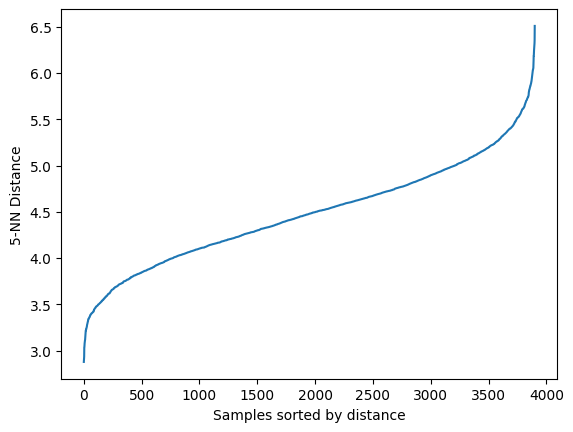

In [206]:
# DBSCAN
# Determinig eps

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=42)  # 5 is a default for min_samples
neighbors_fit = neighbors.fit(df_reduced)
distances, indices = neighbors_fit.kneighbors(df_reduced)
distances = np.sort(distances[:, 4])  # 4 because index starts at 0
plt.plot(distances)
plt.ylabel("5-NN Distance")
plt.xlabel("Samples sorted by distance")
plt.show()

# shows eps as 1.7 to 2.0

In [39]:
# 9# Appliying DBSCAN with  eps 1.7 to 2.0

# from sklearn.cluster import DBSCAN

# # After choosing suitable eps from the k-distance plot
# dbscan = DBSCAN(eps=1.6, min_samples=30)
# labels = dbscan.fit_predict(df_reduced)

# # -1 labels are noise points
# print(np.unique(labels, return_counts=True))

In [40]:
# df_reduced[:5]

In [ ]:
# function to check different DBSCAN EPS AND SAMPLE
# WITH HIGHEST SCORE

# from sklearn.metrics import silhouette_score
# from sklearn.cluster import DBSCAN

# all_experiments = []

# def calculateScore(eps=1.9, min_samples=6, min_score = 0.2):
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(df_reduced)

#     labels = dbscan.labels_
#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#     if n_clusters > 1:
#         # Exclude noise points for the score calculation
#         mask = labels != -1
#         score = silhouette_score(df_reduced[mask], labels[mask])
#         score_adjusted = round(score * 1000) / 1000
#         n_noise = np.sum(labels == -1)
#         noise_percentage = 100 * n_noise / len(labels)

#         if score_adjusted > min_score:
#             all_experiments.append(
#                 {
#                     "score": score_adjusted,
#                     "eps": eps,
#                     "min_samples": min_samples,
#                     "n_clusters": n_clusters,
#                     "noise": round(float(noise_percentage) * 100) / 100 ,
#                 }
#             )

# # calculateScore(7.7, 37)

# for eps in range(29, 58):  # This is EPS
#     for n_samples in range(3,30):
#         calculateScore(eps / 10, n_samples)
#         # print(eps / 10, n_samples)
#         # all_experiments

In [ ]:
# modified = all_experiments
# modified = filter(
#     # lambda e: e["n_clusters"] >= 2 and e["n_clusters"] <= 17, all_experiments
#     lambda e: e["noise"] <= 5,
#     # lambda e: e["noise"] <= 5 and e["n_clusters"] == 18,
#     # lambda e: e["noise"] <= 5 and e["n_clusters"] == 17,
#     all_experiments,
# )
# # sorted_modified = sorted(modified, key=lambda e: e["noise"])
# # sorted_modified = sorted(modified, key=lambda e: e["n_clusters"])
# sorted_modified = sorted(modified, key=lambda e: e["score"])
# print("Total = ", len(list(sorted_modified)))
# # list(sorted_modified[::])
# list(sorted_modified[::-1])

Total =  22


[{'score': 0.267,
  'eps': 5.0,
  'min_samples': 6,
  'n_clusters': 22,
  'noise': 4.54},
 {'score': 0.266,
  'eps': 5.0,
  'min_samples': 5,
  'n_clusters': 22,
  'noise': 3.72},
 {'score': 0.266,
  'eps': 5.0,
  'min_samples': 4,
  'n_clusters': 22,
  'noise': 3.44},
 {'score': 0.259,
  'eps': 5.1,
  'min_samples': 10,
  'n_clusters': 21,
  'noise': 4.92},
 {'score': 0.248,
  'eps': 5.1,
  'min_samples': 9,
  'n_clusters': 20,
  'noise': 4.46},
 {'score': 0.248,
  'eps': 5.1,
  'min_samples': 8,
  'n_clusters': 20,
  'noise': 4.0},
 {'score': 0.247,
  'eps': 5.1,
  'min_samples': 7,
  'n_clusters': 20,
  'noise': 3.38},
 {'score': 0.247,
  'eps': 5.1,
  'min_samples': 6,
  'n_clusters': 20,
  'noise': 2.87},
 {'score': 0.246,
  'eps': 5.1,
  'min_samples': 5,
  'n_clusters': 20,
  'noise': 2.54},
 {'score': 0.246,
  'eps': 5.1,
  'min_samples': 4,
  'n_clusters': 20,
  'noise': 2.33},
 {'score': 0.244,
  'eps': 5.0,
  'min_samples': 3,
  'n_clusters': 24,
  'noise': 2.69},
 {'score':

In [212]:
# 9# Appliying DBSCAN with  eps 1.7 to 2.0

from sklearn.cluster import DBSCAN

# # After choosing suitable eps from the k-distance plot
dbscan = DBSCAN(eps=5.2, min_samples=11)
labels = dbscan.fit_predict(df_reduced)

# # -1 labels are noise points
print(np.unique(labels, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17]), array([ 137, 1292,  153,  145,  144,  149,  163,  131,  131,  143,  139,
        145,  152,  150,  134,  139,  165,  145,  143]))


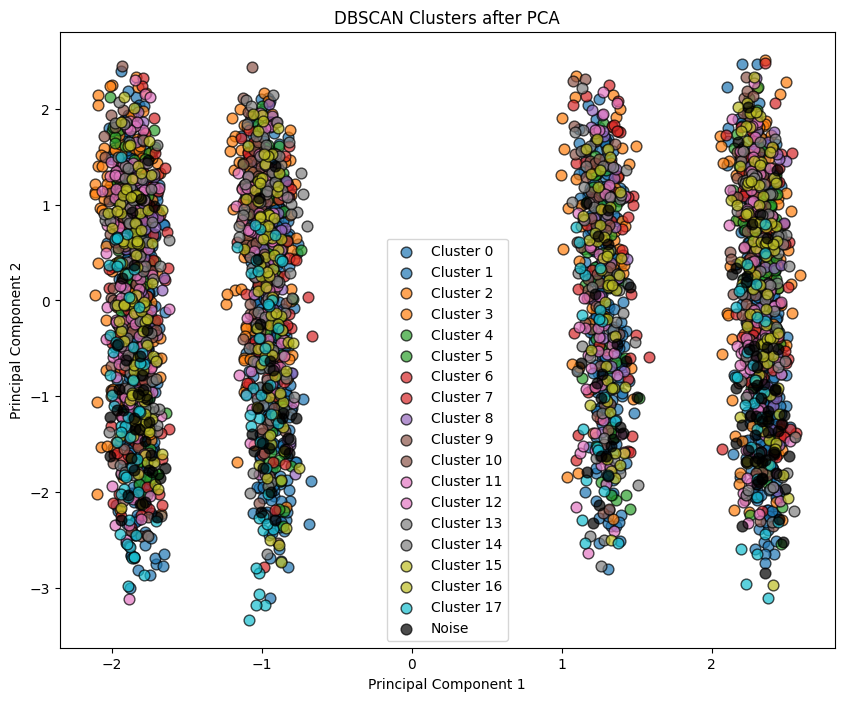

In [213]:
# Visualization

# Visualization (for 2D PCA)
plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise.
        col = [0, 0, 0, 1]
        label_name = "Noise"
    else:
        label_name = f"Cluster {k}"
    class_member_mask = labels == k
    plt.scatter(
        df_reduced[class_member_mask, 0],
        df_reduced[class_member_mask, 1],
        s=60,
        c=[col],
        label=label_name,
        alpha=0.7,
        edgecolors="k",
    )

plt.title("DBSCAN Clusters after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [46]:
# from sklearn.metrics import silhouette_score

# # Only compute silhouette if two or more clusters exist (excluding noise)
# labels = dbscan.labels_
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# if n_clusters > 1:
#     # Exclude noise points for the score calculation
#     mask = labels != -1
#     score = silhouette_score(df_reduced[mask], labels[mask])
#     print(f"Silhouette Score (excluding noise): {score:.3f}")
# else:
#     print("Not enough clusters to calculate silhouette score.")

In [214]:
# Kmeans shows sillhout score of 0.033
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will calculate the Within-Cluster-Sum-of-Squares (WCSS) for a range of k values
wcss = []
cluster_range = range(1, 11)  # Testing for 1 to 10 clusters

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(df_reduced)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

print("--- WCSS for each k ---")
for k, score in zip(cluster_range, wcss):
    print(f"k={k}: {score:.2f}")

--- WCSS for each k ---
k=1: 182282.36
k=2: 171254.85
k=3: 167607.83
k=4: 164014.39
k=5: 160387.07
k=6: 156766.04
k=7: 153126.18
k=8: 149495.44
k=9: 145792.98
k=10: 142146.39


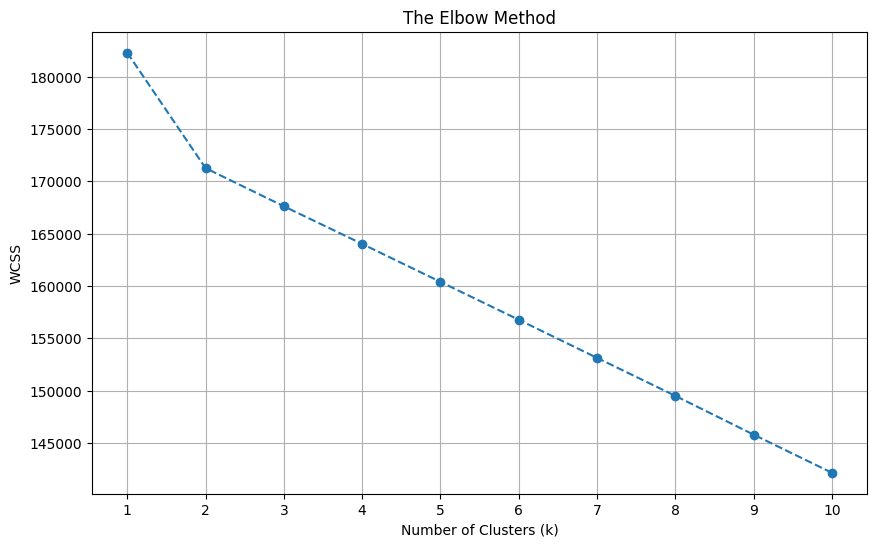

In [215]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

#### Step 10: Fit Clustering Model

Based on the elbow plot, we will select the optimal number of clusters (`k`). We then fit the K-Means model to the scaled data with this chosen `k`. After fitting, we will add the resulting cluster labels back to our original dataframe to facilitate analysis.


In [216]:
# Set the optimal number of clusters based on the elbow plot
# optimal_k = 2
optimal_k = 2 # Should be 2 but choosing 3 for builidng more clusters

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(df_reduced)

# Add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

print(f"--- Successfully fitted K-Means with {optimal_k} clusters ---")
print("\nCluster distribution:")
print(df['Cluster'].value_counts())

print("\nDataframe with Cluster labels:")
df.head()

--- Successfully fitted K-Means with 2 clusters ---

Cluster distribution:
Cluster
1    2223
0    1677
Name: count, dtype: int64

Dataframe with Cluster labels:


,Gender,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Location_Region,Age Group,Cluster
0,Male,Clothing,53.0,L,Gray,Winter,3.1,Yes,Yes,Yes,14.0,Venmo,0.50,South,Middle-Aged,0
1,Male,Clothing,64.0,L,Maroon,Winter,3.1,Yes,Yes,Yes,2.0,Cash,0.50,Northeast,Young Adult,0
2,Male,Clothing,73.0,S,Maroon,Spring,3.1,Yes,Yes,Yes,23.0,Credit Card,0.25,Northeast,Middle-Aged,0
3,Male,Footwear,90.0,M,Maroon,Spring,3.5,Yes,Yes,Yes,49.0,PayPal,0.25,Northeast,Young Adult,0
4,Male,Clothing,49.0,M,Turquoise,Spring,2.7,Yes,Yes,Yes,31.0,PayPal,12.00,West,Middle-Aged,0


#### Step 11: Evaluate Clusters

To evaluate the quality of our clusters, we will use the **Silhouette Score**. This metric measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


In [50]:
# from sklearn.metrics import silhouette_score

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# print(f"--- Cluster Evaluation ---")
# print(f"Optimal k: {optimal_k}")
# print(f"Silhouette Score: {silhouette_avg:.3f}")

#### Step 12: Visualize Clusters

Since our data has many dimensions, we cannot plot it directly. We will use **Principal Component Analysis (PCA)** to reduce the dimensionality to two components, which we can then visualize in a scatter plot. This allows us to see the separation of the customer segments.


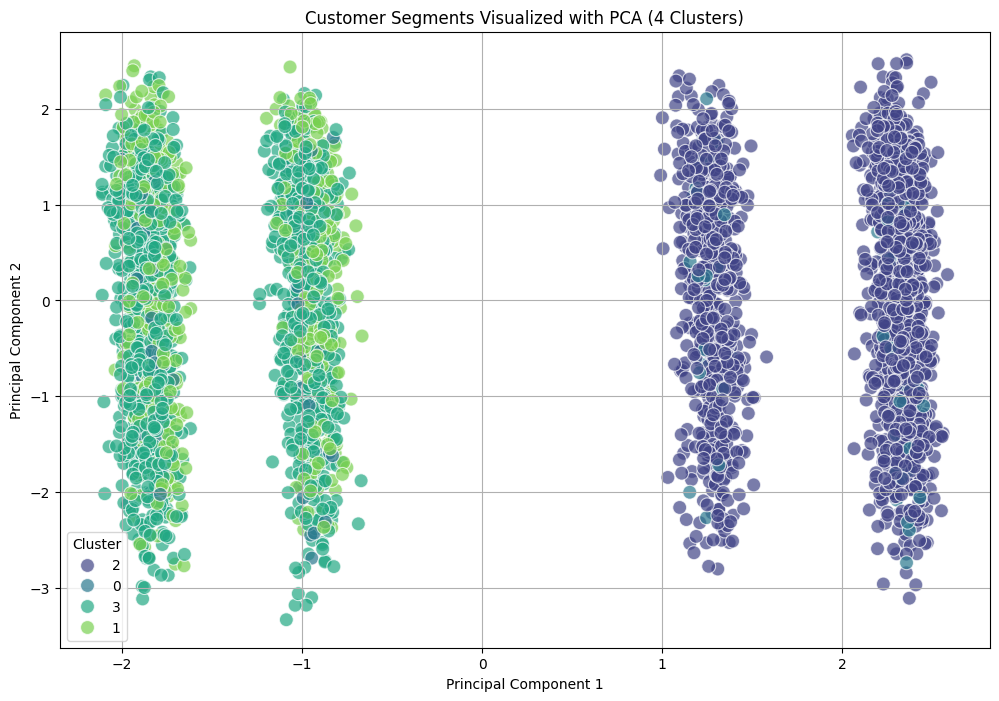

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assume df_scaled is your scaled and preprocessed feature dataframe

# Step 1: Fit K-Means for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Step 2: PCA for visualization (2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 3: Create DataFrame for plotting
plot_df = pd.DataFrame(
    data=df_pca,
    columns=["Principal Component 1", "Principal Component 2"],
)
plot_df["Cluster"] = cluster_labels.astype(str)  # Ensure string for color mapping

# Step 4: Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Principal Component 1",
    y="Principal Component 2",
    hue="Cluster",
    data=plot_df,
    palette="viridis",  # You can use 'tab10' for distinct colors
    s=100,
    alpha=0.7,
)
plt.title("Customer Segments Visualized with PCA (4 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()